## Ingesta de los datos 
Utilizamos la libreria Meteostat, la cual descarga informacion relacionada al clima de diversas fuentes 
Meteostat usa como parametro la longitud, latitud, elevacion, fecha inicio y fecha final
En este caso, solo hacemos variar los 3 primeros parametros en funcion de los 5 Boroughs

paso 1: Se crea una lista con los parametros de cada borough
paso 2: Se realiza la descarga en un unico dataframe, a traves de un for

In [1]:
#cada tupla tiede: latitud, longitud, elevacion, nombre del boroug
bronx = [40.8499, -73.8664, 19, "The Bronx"]
brooklyn = [40.6501, -73.9496, 18, 'Brooklyn']
manhattan = [40.7834, -73.9663, 38, 'Manhattan']
queens = [40.6815, -73.8365, 13, 'Queens']
staten_island = [40.5623, -74.1399, 23, 'Staten Island']

#generamos una lista  con las tuplas
lista = [bronx, brooklyn, manhattan, queens,staten_island]


In [2]:
#importamos las librerias 
from datetime import datetime
import matplotlib.pyplot as plt
#PIP INSTALL METEOSTAT
from meteostat import Point, Daily, Hourly
import pandas as pd

In [3]:
#descarga de la informacion 
#descargamos la info de todos los boroughs en un mismo dataframe

df_list = []
for i in lista:
    #Seteo del periodo estudiado
    start = datetime(2018, 1, 1)
    end = datetime(2018, 1, 31, 23, 59)
    #seteo de locacion (latitud, longitud, elevacion)
    location = Point([i][0][0], [i][0][1], [i][0][2])
    # indicamos que queremos una frecuencia por hora
    data = Hourly(location, start, end)
    data = data.fetch()
    #creamos un dataframe
    df = pd.DataFrame(data)
    df['Borough'] = [i][0][3]
    df_list.append(df)
df = pd.concat(df_list)  


In [4]:
#transformamos el indice 'time' en columna
df.reset_index(inplace=True)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     3605 non-null   datetime64[ns]
 1   temp     3605 non-null   float64       
 2   dwpt     3605 non-null   float64       
 3   rhum     3605 non-null   float64       
 4   prcp     3493 non-null   float64       
 5   snow     0 non-null      float64       
 6   wdir     3564 non-null   float64       
 7   wspd     3605 non-null   float64       
 8   wpgt     0 non-null      float64       
 9   pres     3599 non-null   float64       
 10  tsun     0 non-null      float64       
 11  coco     560 non-null    float64       
 12  Borough  3605 non-null   object        
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 366.3+ KB
None


## Limpieza de datos 
1) Las columnas tsun, wpgt, snow no tienen ningun registro, con lo cual se eliminan. coco tiene muchos valores faltantes
2) las columnas prcp, pres, wdir tienen unos pocos faltantes
3) es necesario nombres de columnas adecuadas 
4) es necesario hacer una columna con la fecha concatenada con el borough

In [5]:
#eliminamos las columnas con valores muchos valores nulos (o todos)
df.drop(["snow"], axis = 1, inplace = True)
df.drop(["wpgt"], axis = 1, inplace = True)
df.drop(["tsun"], axis = 1, inplace = True)
df.drop(["coco"], axis = 1, inplace = True)

In [6]:
df.head(20)

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,Borough
0,2018-01-01 00:00:00,-10.7,-20.1,46.0,NaN,NaN,320.0,18.4,NaN,1026.7,NaN,NaN,The Bronx
1,2018-01-01 01:00:00,-11.8,-20.6,48.0,0.0,NaN,330.0,18.4,NaN,1026.7,NaN,NaN,The Bronx
2,2018-01-01 02:00:00,-12.3,-20.6,50.0,0.0,NaN,320.0,13.0,NaN,1027.0,NaN,NaN,The Bronx
3,2018-01-01 03:00:00,-12.3,-20.6,50.0,0.0,NaN,330.0,20.5,NaN,1026.8,NaN,NaN,The Bronx
4,2018-01-01 04:00:00,-12.9,-20.1,55.0,0.0,NaN,320.0,20.5,NaN,1027.1,NaN,NaN,The Bronx
5,2018-01-01 05:00:00,-12.9,-20.1,55.0,0.0,NaN,340.0,16.6,NaN,1026.9,NaN,NaN,The Bronx
6,2018-01-01 06:00:00,-13.4,-20.1,57.0,0.0,NaN,330.0,14.8,NaN,1027.1,NaN,NaN,The Bronx
7,2018-01-01 07:00:00,-13.4,-20.1,57.0,0.0,NaN,330.0,16.6,NaN,1027.4,NaN,NaN,The Bronx
8,2018-01-01 08:00:00,-13.4,-20.7,54.0,0.0,NaN,330.0,25.9,NaN,1027.6,NaN,NaN,The Bronx
9,2018-01-01 09:00:00,-14.0,-20.7,57.0,0.0,NaN,310.0,20.5,NaN,1027.7,NaN,NaN,The Bronx


In [6]:
#prcp tiene muy pocos valores nulos. y la mayoria de los casos a la 1am. con lo cual, vamos a asumir que cuando es nulo, es cero 
df['prcp'].fillna(0, inplace = True)

In [7]:
# en cuanto a las columnas wdir (direccion del viento) y pres (presion atmosferica), le impotumos el promedio por borough.

a = df['wdir'].mean() #promedio de direccion de viento
df['wdir'].fillna(a, inplace=True)
   
b = df['pres'].mean() #promedio de direccion de viento
df['pres'].fillna(b, inplace=True) #promedio de presion atmosferica
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     3720 non-null   datetime64[ns]
 1   temp     3720 non-null   float64       
 2   dwpt     3720 non-null   float64       
 3   rhum     3720 non-null   float64       
 4   prcp     3720 non-null   float64       
 5   wdir     3720 non-null   float64       
 6   wspd     3720 non-null   float64       
 7   pres     3720 non-null   float64       
 8   Borough  3720 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 261.7+ KB
None


In [10]:
print(df.head(20))

                  time  temp  dwpt  rhum  prcp   wdir  wspd    pres    Borough
0  2018-01-01 00:00:00 -10.7 -20.1  46.0   0.0  320.0  18.4  1026.7  The Bronx
1  2018-01-01 01:00:00 -11.8 -20.6  48.0   0.0  330.0  18.4  1026.7  The Bronx
2  2018-01-01 02:00:00 -12.3 -20.6  50.0   0.0  320.0  13.0  1027.0  The Bronx
3  2018-01-01 03:00:00 -12.3 -20.6  50.0   0.0  330.0  20.5  1026.8  The Bronx
4  2018-01-01 04:00:00 -12.9 -20.1  55.0   0.0  320.0  20.5  1027.1  The Bronx
5  2018-01-01 05:00:00 -12.9 -20.1  55.0   0.0  340.0  16.6  1026.9  The Bronx
6  2018-01-01 06:00:00 -13.4 -20.1  57.0   0.0  330.0  14.8  1027.1  The Bronx
7  2018-01-01 07:00:00 -13.4 -20.1  57.0   0.0  330.0  16.6  1027.4  The Bronx
8  2018-01-01 08:00:00 -13.4 -20.7  54.0   0.0  330.0  25.9  1027.6  The Bronx
9  2018-01-01 09:00:00 -14.0 -20.7  57.0   0.0  310.0  20.5  1027.7  The Bronx
10 2018-01-01 10:00:00 -14.0 -20.7  57.0   0.0  310.0  24.1  1027.8  The Bronx
11 2018-01-01 11:00:00 -14.0 -21.1  55.0   0.0  320.

In [8]:
#colocamos un nombre adecuado a cada columna
df.rename(columns={"dwpt": "dew_point", "rhum": "hum", "prcp":"rain", "Borough":"borough", "wdir":"wind_dir", "wspd":"wind_speed"}, inplace=True)

In [10]:
df.head(5)

,time,temp,dew_point,hum,rain,snow,wind_dir,wind_speed,wpgt,pres,tsun,coco,borough
0,2018-01-01 00:00:00,-10.7,-20.1,46.0,0.0,NaN,320.0,18.4,NaN,1026.7,NaN,NaN,The Bronx
1,2018-01-01 01:00:00,-11.8,-20.6,48.0,0.0,NaN,330.0,18.4,NaN,1026.7,NaN,NaN,The Bronx
2,2018-01-01 02:00:00,-12.3,-20.6,50.0,0.0,NaN,320.0,13.0,NaN,1027.0,NaN,NaN,The Bronx
3,2018-01-01 03:00:00,-12.3,-20.6,50.0,0.0,NaN,330.0,20.5,NaN,1026.8,NaN,NaN,The Bronx
4,2018-01-01 04:00:00,-12.9,-20.1,55.0,0.0,NaN,320.0,20.5,NaN,1027.1,NaN,NaN,The Bronx


In [11]:
df['borough'].unique()

array(['The Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

creamos una nueva tabla de boroughs

In [9]:
df_borough = pd.DataFrame(df['borough'].unique())

In [10]:
df_borough.reset_index(inplace = True)

In [11]:
df_borough.rename(columns={0: "borough", "index":"id_borough"}, inplace=True)

renombramos las columnas 

In [12]:
df_borough

,id_borough,borough
0,0,The Bronx
1,1,Brooklyn
2,2,Manhattan
3,3,Queens
4,4,Staten Island


In [23]:
df_borough.to_csv('data_borough.csv')

REEMPLAZAMOS EN LA TABLA PRINCIPAL EL ID_BOROUGH. de manera que normalizamos las tablas 

In [13]:
df.replace({"The Bronx":0, "Brooklyn":1, "Manhattan":2, "Queens":3, "Staten Island":4}, inplace=True)

renombramos la tabla borough por id_borough

In [14]:
df.rename(columns={"borough":"id_borough"}, inplace=True)

Busqueda de outliers

In [17]:
df.describe()

,temp,dew_point,hum,rain,snow,wind_dir,wind_speed,wpgt,pres,tsun,coco,id_borough
count,3605.000000,3605.000000,3605.00000,3605.000000,0.0,3605.000000,3605.000000,0.0,3605.000000,0.0,560.000000,3605.00000
mean,-0.463689,-7.273481,62.25742,1.280999,NaN,219.203143,15.330624,NaN,1022.250736,NaN,7.992857,2.00000
std,7.162214,9.114539,18.60086,17.355179,NaN,107.010296,10.717785,NaN,9.914856,NaN,3.948680,1.41441
min,-16.800000,-25.600000,18.00000,0.000000,NaN,10.000000,0.000000,NaN,989.400000,NaN,3.000000,0.00000
25%,-5.700000,-14.600000,49.00000,0.000000,NaN,160.000000,7.600000,NaN,1016.800000,NaN,5.000000,1.00000
50%,-0.700000,-7.200000,59.00000,0.000000,NaN,250.000000,14.800000,NaN,1023.100000,NaN,7.000000,2.00000
75%,4.900000,-1.300000,75.00000,0.000000,NaN,310.000000,22.300000,NaN,1029.100000,NaN,14.000000,3.00000
max,17.900000,16.800000,100.00000,253.700000,NaN,360.000000,57.600000,NaN,1041.100000,NaN,25.000000,4.00000


a simple vista, los datos pareces ser coherentes salvo en el caso de rain, 
tien una maxima de 253 lo cual es lalmativo

graficamos un histograma para cada variable

<AxesSubplot:title={'center':'Distribucion de temp'}, xlabel='temp', ylabel='Count'>

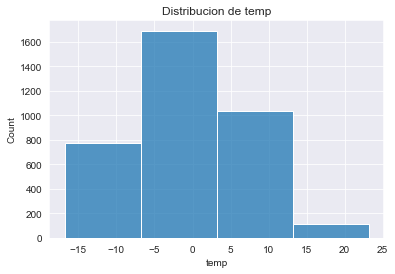

In [18]:
import seaborn as sns

sns.set_style("darkgrid")
plt.title("Distribucion de temp")
sns.histplot(data=df, x="temp", binwidth=10)


<AxesSubplot:title={'center':'Distribucion de dew_point'}, xlabel='dew_point', ylabel='Count'>

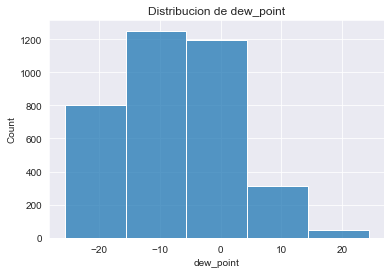

In [22]:
sns.set_style("darkgrid")
plt.title("Distribucion de dew_point")
sns.histplot(data=df, x="dew_point", binwidth=10)

<AxesSubplot:title={'center':'Distribucion de hum'}, xlabel='hum', ylabel='Count'>

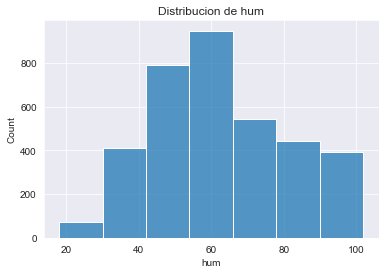

In [23]:
sns.set_style("darkgrid")
plt.title("Distribucion de hum")
sns.histplot(data=df, x="hum", binwidth=12)

<AxesSubplot:title={'center':'rain distribution'}, xlabel='rain', ylabel='Count'>

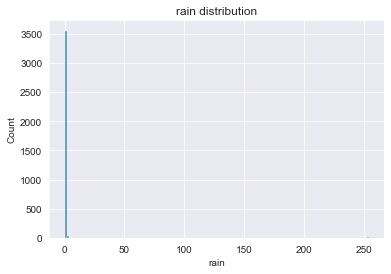

In [27]:
sns.set_style("darkgrid")
plt.title("rain distribution")
sns.histplot(data=df, x="rain", binwidth=2)

el grafico anterior nos muestra que POSIBLEMENTE existen algunos pocos outliers, probablemente errores de medicion

<AxesSubplot:title={'center':'wind_dir distribution'}, xlabel='wind_dir', ylabel='Count'>

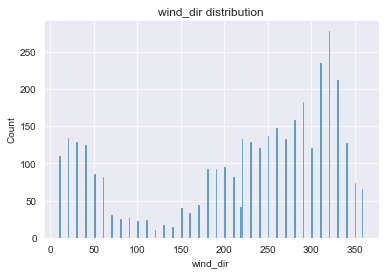

In [19]:
sns.set_style("darkgrid")
plt.title("wind_dir distribution")
sns.histplot(data=df, x="wind_dir", binwidth=2)

<AxesSubplot:title={'center':'Distribucion de wind_speed'}, xlabel='wind_speed', ylabel='Count'>

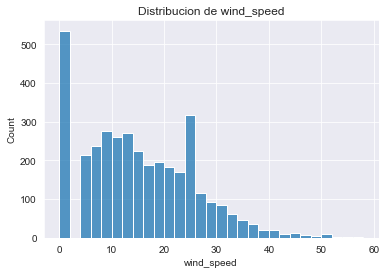

In [26]:
sns.set_style("darkgrid")
plt.title("Distribucion de wind_speed")
sns.histplot(data=df, x="wind_speed", binwidth=2)

<AxesSubplot:title={'center':'pres distribution'}, xlabel='pres', ylabel='Count'>

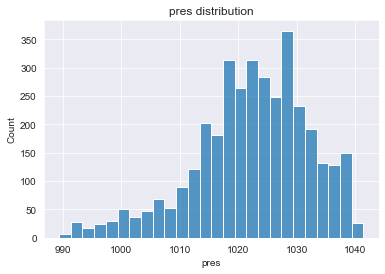

In [20]:
sns.set_style("darkgrid")
plt.title("pres distribution")
sns.histplot(data=df, x="pres", binwidth=2)

Al parecer, la unica columna que posiblemente tiene outliers es rain
se investiga las columnas mas en produndidad, ordenando los valores de mayor a menor

In [21]:
df['rain'].sort_values(ascending=False).head(20)

1747    253.7
1853    253.7
1742    253.7
1723    253.7
1752    253.7
1820    253.7
1658    253.7
1697    253.7
1514    253.4
1019    253.2
720     253.2
3182    253.2
1740    253.2
2162    253.2
2461    253.2
1624    252.7
1679    251.7
3168      5.6
1005      4.3
811       4.1
Name: rain, dtype: float64

no es sencillo determinar si se trata de outliers, ya que estan por debajo del record historico de precipitacion por hora

https://es.wikipedia.org/wiki/Anexo:R%C3%A9cords_meteorol%C3%B3gicos_mundiales#:~:text=1%20hora%3A%20305%20mm%20%28en%2042%20minutos%29%20Holt,Estados%20Unidos%29%2C%2022%20de%20junio%20de%201947.%2065

Con lo cual son valores plausibles


In [35]:
df[df["rain"] > 10]

,time,temp,dew_point,hum,rain,wind_dir,wind_speed,pres,id_borough
720,2018-01-31 00:00:00,-1.8,-10.6,51.0,253.2,320.000000,35.3,1018.4,0
1019,2018-01-13 10:00:00,12.1,11.6,97.0,253.2,130.000000,7.6,993.1,1
1514,2018-01-04 00:00:00,-1.9,-7.4,66.0,253.4,120.000000,7.6,1021.0,2
1624,2018-01-08 14:00:00,-5.8,-11.3,65.0,252.7,240.000000,14.8,1024.3,2
1658,2018-01-10 00:00:00,3.7,-5.3,52.0,253.7,330.000000,0.0,1025.8,2
1679,2018-01-10 21:00:00,4.2,-2.9,60.0,251.7,160.000000,5.4,1030.3,2
1697,2018-01-11 15:00:00,4.8,2.7,86.0,253.7,219.203143,0.0,1029.3,2
1723,2018-01-12 17:00:00,14.8,14.2,96.0,253.7,240.000000,13.0,1010.8,2
1740,2018-01-13 10:00:00,10.9,10.4,97.0,253.2,280.000000,9.4,992.6,2
1742,2018-01-13 12:00:00,6.5,4.8,89.0,253.7,310.000000,5.4,999.1,2


In [15]:
import numpy as np
df[df["rain"] > 50]

,time,temp,dew_point,hum,rain,wind_dir,wind_speed,pres,id_borough
720,2018-01-31 00:00:00,-1.8,-10.6,51.0,253.2,320.000000,35.3,1018.4,0
1042,2018-01-13 10:00:00,12.1,11.6,97.0,253.2,130.000000,7.6,993.1,1
1560,2018-01-04 00:00:00,-1.9,-7.4,66.0,253.4,120.000000,7.6,1021.0,2
1670,2018-01-08 14:00:00,-5.8,-11.3,65.0,252.7,240.000000,14.8,1024.3,2
1704,2018-01-10 00:00:00,3.7,-5.3,52.0,253.7,330.000000,0.0,1025.8,2
1725,2018-01-10 21:00:00,4.2,-2.9,60.0,251.7,160.000000,5.4,1030.3,2
1743,2018-01-11 15:00:00,4.8,2.7,86.0,253.7,221.125306,0.0,1029.3,2
1769,2018-01-12 17:00:00,14.8,14.2,96.0,253.7,240.000000,13.0,1010.8,2
1786,2018-01-13 10:00:00,10.9,10.4,97.0,253.2,280.000000,9.4,992.6,2
1788,2018-01-13 12:00:00,6.5,4.8,89.0,253.7,310.000000,5.4,999.1,2


Se decide modificar los outliers

In [16]:
df.loc[df.rain > 20, 'rain'] = 1

#seteamos igual a 1 aquellos valores que sean mayor a 200

In [17]:
df[df["rain"] > 20]

,time,temp,dew_point,hum,rain,wind_dir,wind_speed,pres,id_borough


<AxesSubplot:title={'center':'Rain distribution (without outliers'}, xlabel='rain', ylabel='Count'>

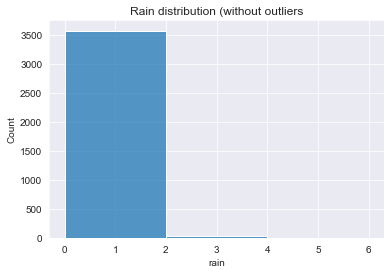

In [18]:
sns.set_style("darkgrid")
plt.title("Rain distribution (without outliers")
sns.histplot(data=df, x="rain", binwidth=2)

CREACION DE CLAVE SUBROGADA

In [18]:
from datetime import datetime

In [23]:
#CAMBIAR EL FORMATO
from datetime import datetime


Se concatena el anio, mes dia hora e id_borough para formar una clave sub

In [19]:
df['id_time_borough'] = df.time.dt.strftime('%Y%m%d%H') + df.id_borough.astype(str)


In [20]:
df["id_time_borough"].nunique()

3720

se comprueba que no hay clases repetidas

In [19]:
df.head()

,time,temp,dew_point,hum,rain,wind_dir,wind_speed,pres,id_borough,id_time_borough
0,2018-01-01 00:00:00,-10.7,-20.1,46.0,0.0,320.0,18.4,1026.7,0,20180101000
1,2018-01-01 01:00:00,-11.8,-20.6,48.0,0.0,330.0,18.4,1026.7,0,20180101010
2,2018-01-01 02:00:00,-12.3,-20.6,50.0,0.0,320.0,13.0,1027.0,0,20180101020
3,2018-01-01 03:00:00,-12.3,-20.6,50.0,0.0,330.0,20.5,1026.8,0,20180101030
4,2018-01-01 04:00:00,-12.9,-20.1,55.0,0.0,320.0,20.5,1027.1,0,20180101040


In [21]:
df[df['dew_point'] < df['temp']].count()

time               3645
temp               3645
dew_point          3645
hum                3645
rain               3645
wind_dir           3645
wind_speed         3645
pres               3645
id_borough         3645
id_time_borough    3645
dtype: int64

In [22]:
df.to_csv('data_weather.csv')